In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.shape

(7043, 21)

In [3]:
#drop customerID column
data.drop("customerID", axis = 1, inplace = True) 
print(data.shape)
data.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# see if there are missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [5]:
# convert yes/no categorical variables into 1/0 dummy variables
data_new=pd.get_dummies(data, columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn' ])
data_new.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,...,0,1,1,0,1,0,0,1,1,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,...,1,0,1,0,0,1,1,0,1,0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,...,1,0,1,0,0,1,0,1,0,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,...,1,0,1,0,1,0,1,0,1,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,...,1,0,1,0,0,1,0,1,0,1


In [6]:
# only need categories-1 dummy variables
data_new.drop("gender_Female", axis = 1, inplace = True)
data_new.drop("Partner_No", axis = 1, inplace = True) 
data_new.drop("Dependents_No", axis = 1, inplace = True)
data_new.drop("PhoneService_No", axis = 1, inplace = True)
data_new.drop("PaperlessBilling_No", axis = 1, inplace = True)
#data_new.drop("Churn_No", axis = 1, inplace = True)
data_new.head()

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,...,Electronic check,29.85,29.85,0,1,0,0,1,1,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,...,Mailed check,56.95,1889.5,1,0,0,1,0,1,0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,...,Mailed check,53.85,108.15,1,0,0,1,1,0,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,...,Bank transfer (automatic),42.30,1840.75,1,0,0,0,0,1,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,...,Electronic check,70.70,151.65,0,0,0,1,1,0,1


In [7]:
# convert other categorical variables into 1/0 dummy variables
data_new2=pd.get_dummies(data_new, columns=['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])
data_new2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.5,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0


In [8]:
data_new2.drop("MultipleLines_No phone service", axis = 1, inplace = True) 
data_new2.drop("InternetService_No", axis = 1, inplace = True)
data_new2.drop("OnlineSecurity_No internet service", axis = 1, inplace = True)
data_new2.drop('OnlineBackup_No internet service', axis=1, inplace=True)
data_new2.drop('DeviceProtection_No internet service', axis=1, inplace=True)
data_new2.drop('TechSupport_No internet service', axis=1, inplace=True)
# data_new2.drop('StreamingTV_No internet service', axis=1, inplace=True)
# data_new2.drop('StreamingMovies_No internet service', axis=1, inplace=True)
data_new2.drop('Contract_Month-to-month', axis=1, inplace=True)
data_new2.drop('PaymentMethod_Bank transfer (automatic)', axis=1, inplace=True) # only need (#categories-1)=3 dummy variables
data_new2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,0,34,56.95,1889.5,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
#deal with totalcharges, since they are not all float64
data_new2['TotalCharges'] = pd.to_numeric(data_new2['TotalCharges'], errors = 'coerce')
data_new2.loc[data_new2['TotalCharges'].isna()==True]
data_new2[data_new2['TotalCharges'].isna()==True] = 0

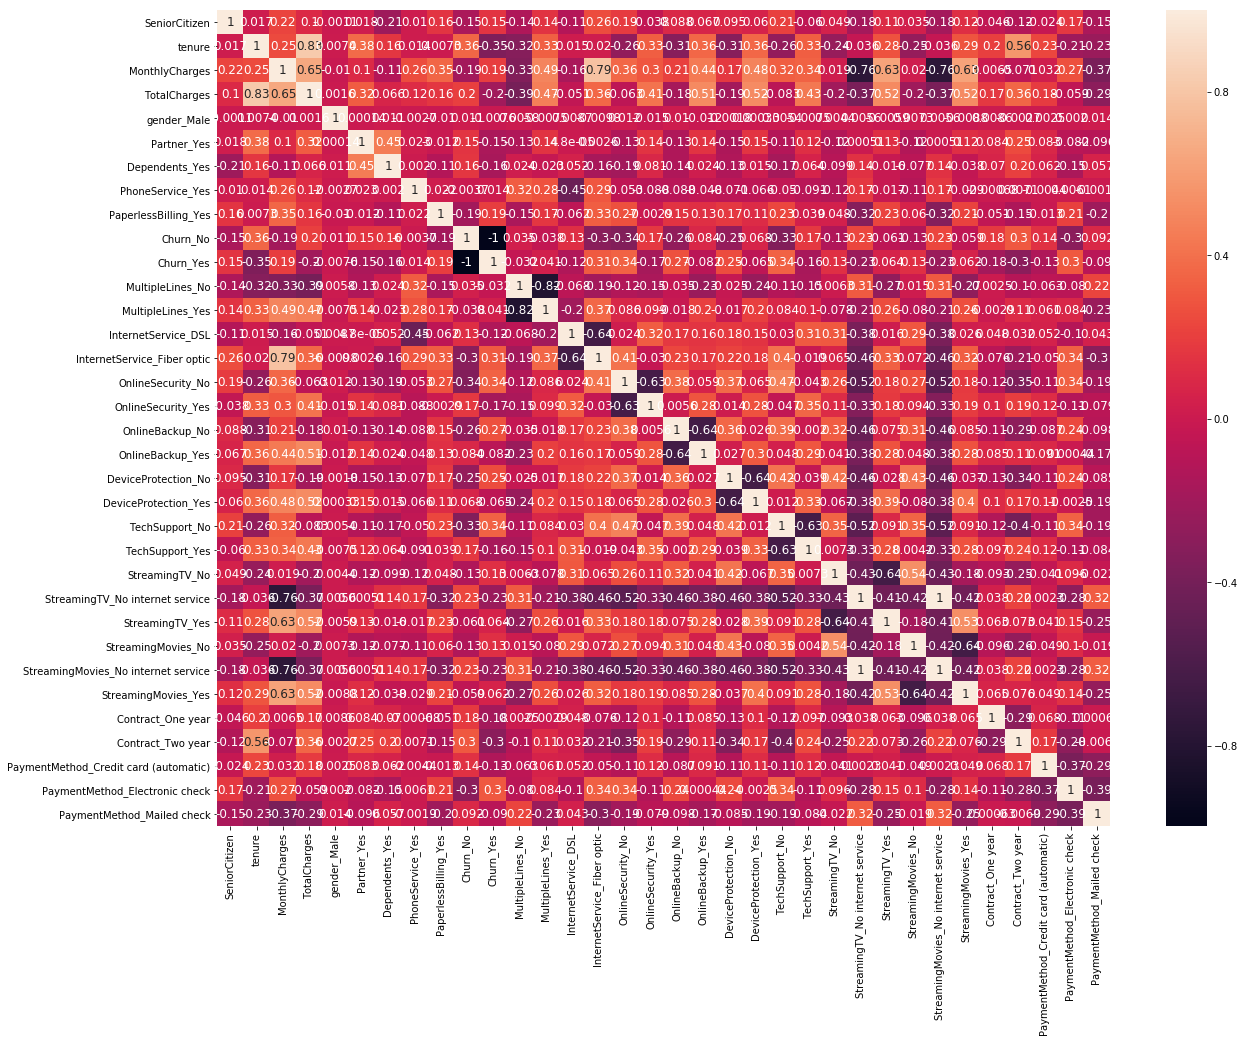

In [10]:
#correlation between customer data features and customer churn
corr = data_new2.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [11]:
#We can see from the correlation heat map that monthlycharge and internetservice_fiber optic are highly correlated
#Streaming TV and streaming movies are highly correlated
#mothly charges, tenure, total charges are highly correlated
#patners and dependents are correlated

In [54]:
# check whether the original data is imbalanced
data_new2_num = float(data_new2.shape[0])
data_new2_churnyes = data_new2.loc[data_new2['Churn_Yes'] == 1]
print("The number of churn_yes is {}".format(data_new2_churnyes.shape[0]))
print("The number of churn_no is {}".format(data_new2_num - data_new2_churnyes.shape[0]))
print ("The fraction of class churn_yes is {}".format(data_new2_churnyes.shape[0]/data_new2_num))

The number of churn_yes is 1869
The number of churn_no is 5174.0
The fraction of class churn_yes is 0.2653698707936959


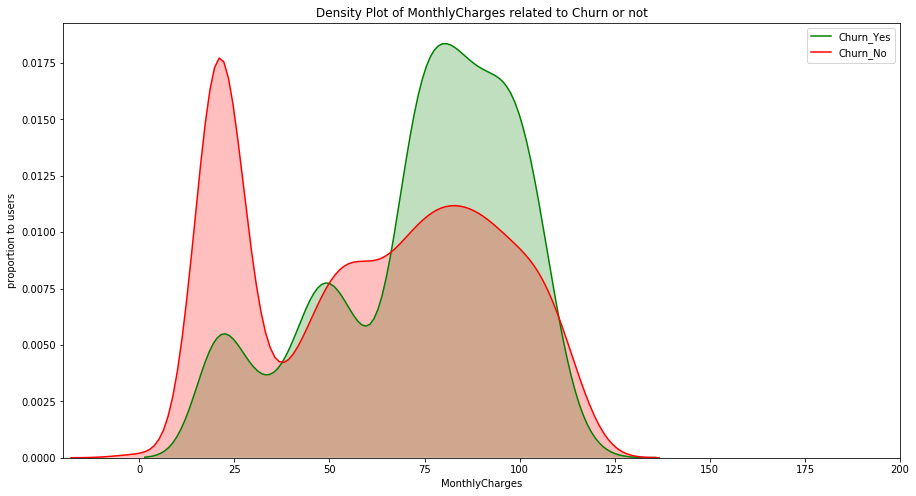

In [13]:
# analyze the Monthly Charge and total charge and tenure, since these three might be correlated according to our intuition
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data_new2["MonthlyCharges"][data_new2.Churn_Yes == 1], color="green", shade=True)
sns.kdeplot(data_new2["MonthlyCharges"][data_new2.Churn_Yes == 0], color="red", shade=True)
plt.legend(['Churn_Yes', 'Churn_No'])
plt.title('Density Plot of MonthlyCharges related to Churn or not')
ax.set(xlabel='MonthlyCharges')
ax.set(ylabel='proportion to users')
plt.xlim(-20,200)
plt.show()

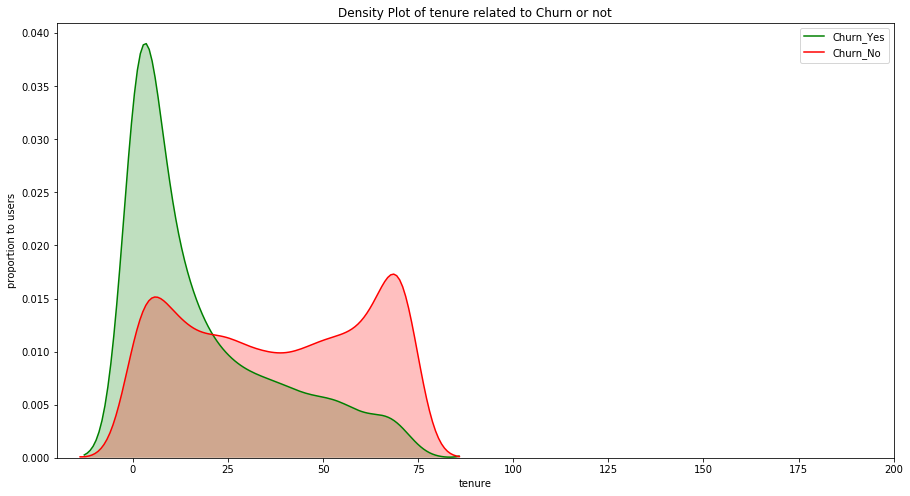

In [14]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data_new2["tenure"][data_new2.Churn_Yes == 1], color="green", shade=True)
sns.kdeplot(data_new2["tenure"][data_new2.Churn_Yes == 0], color="red", shade=True)
plt.legend(['Churn_Yes', 'Churn_No'])
plt.title('Density Plot of tenure related to Churn or not')
ax.set(xlabel='tenure')
ax.set(ylabel='proportion to users')
plt.xlim(-20,200)
plt.show()

In [15]:
#As we can see from the two plots, if mothlychage is higher, it looks like the customers are more likely to churn. 
#And say, after 30 months, customers tenfd to not churn. 
#Since mothlycharges*tenure is very close totalcharges, so we can drop totalcharges

In [16]:
data_new2.drop("TotalCharges", axis = 1, inplace = True)
data_new2.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_No,Churn_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,34,56.95,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,0,2,53.85,1,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0


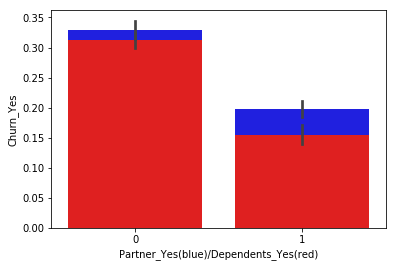

In [17]:
# analyze the relationship between partner and dependents as they looks like correalated
ax = sns.barplot('Partner_Yes', 'Churn_Yes', data=data_new2, color="blue")
sns.barplot('Dependents_Yes', 'Churn_Yes', data=data_new2, color="red")
ax.set(xlabel='Partner_Yes(blue)/Dependents_Yes(red)')
plt.show()

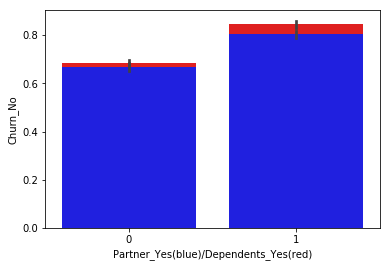

In [18]:
# analyze the relationship between partner and dependents as they looks like correalated
ax = sns.barplot('Dependents_Yes', 'Churn_No', data=data_new2, color="red")
sns.barplot('Partner_Yes', 'Churn_No', data=data_new2, color="blue")
ax.set(xlabel='Partner_Yes(blue)/Dependents_Yes(red)')
plt.show()

In [19]:
#the relationship between partner and dependents is correlated, so we can drop one of this, say depandant

In [20]:
data_new2.drop("Dependents_Yes", axis = 1, inplace = True)
#data_new2.drop("Churn_No", axis = 1, inplace = True)
data_new2.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_No,Churn_Yes,MultipleLines_No,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,34,56.95,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
2,0,2,53.85,1,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,0,0,1,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0


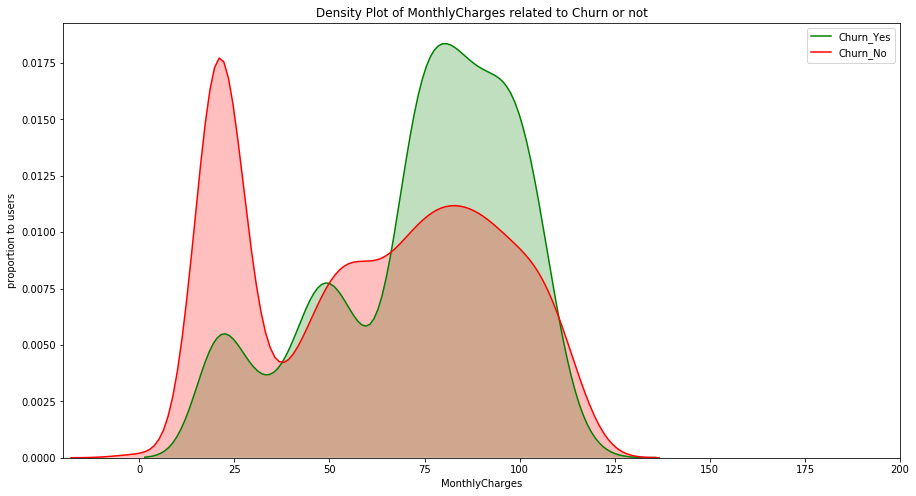

In [21]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data_new2["MonthlyCharges"][data_new2.Churn_Yes == 1], color="green", shade=True)
sns.kdeplot(data_new2["MonthlyCharges"][data_new2.Churn_Yes == 0], color="red", shade=True)
plt.legend(['Churn_Yes', 'Churn_No'])
plt.title('Density Plot of MonthlyCharges related to Churn or not')
ax.set(xlabel='MonthlyCharges')
ax.set(ylabel='proportion to users')
plt.xlim(-20,200)
plt.show()

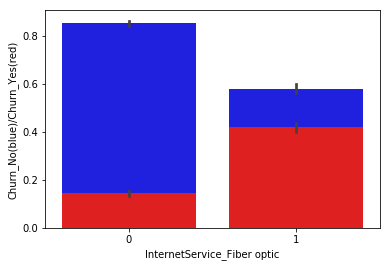

In [22]:
# analyze the relationship between mothlycharge and internetservice_fiber optic as they looks like highly negative correalated
ax = sns.barplot('InternetService_Fiber optic', 'Churn_No', data=data_new2, color="blue")
sns.barplot('InternetService_Fiber optic', 'Churn_Yes', data=data_new2, color="red")
ax.set(ylabel='Churn_No(blue)/Churn_Yes(red)')
plt.show()

In [23]:
data_new2.drop("InternetService_Fiber optic", axis = 1, inplace = True)
data_new2.drop("Churn_No", axis = 1, inplace = True)
data_new2.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,34,56.95,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,0,2,53.85,1,0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,2,70.70,0,0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0


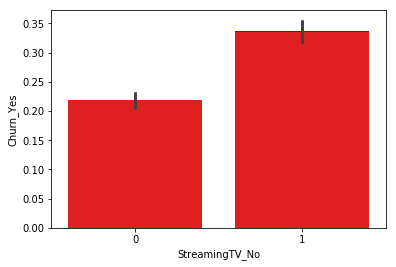

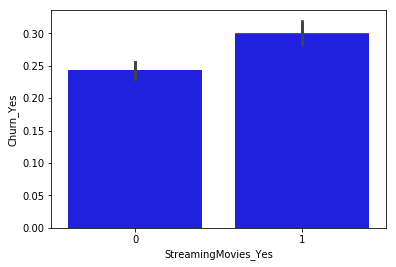

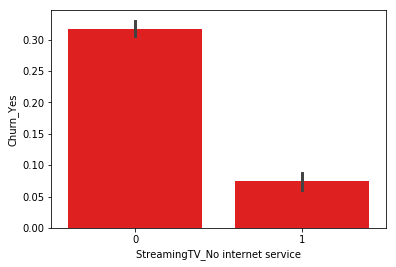

In [24]:
ax = sns.barplot('StreamingMovies_No', 'Churn_Yes', data=data_new2, color="blue")
sns.barplot('StreamingTV_No', 'Churn_Yes', data=data_new2, color="red")
plt.show()
ax = sns.barplot('StreamingTV_Yes', 'Churn_Yes', data=data_new2, color="red")
sns.barplot('StreamingMovies_Yes', 'Churn_Yes', data=data_new2, color="blue")
plt.show()
ax = sns.barplot('StreamingMovies_No internet service', 'Churn_Yes', data=data_new2, color="blue")
sns.barplot('StreamingTV_No internet service', 'Churn_Yes', data=data_new2, color="red")
plt.show()

In [25]:
# the relationship between streamTV and streamMovies is highly correlated, so we can drop one of this, say streamMovies

In [26]:
#the related result looks extremely the same, so we drop 'StreamingMovies' and its related variables
data_new2.drop('StreamingTV_No internet service', axis=1, inplace=True)
data_new2.drop('StreamingMovies_No internet service', axis=1, inplace=True)
data_new2.drop('StreamingMovies_No', axis=1, inplace=True)
data_new2.drop('StreamingMovies_Yes', axis=1, inplace=True)

In [27]:
data_new2.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes,MultipleLines_No,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,34,56.95,1,0,1,0,0,1,0,...,1,1,0,1,0,1,0,0,0,1
2,0,2,53.85,1,0,1,1,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,45,42.30,1,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
4,0,2,70.70,0,0,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Optimal number of features: 25
Selected features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male', 'Partner_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

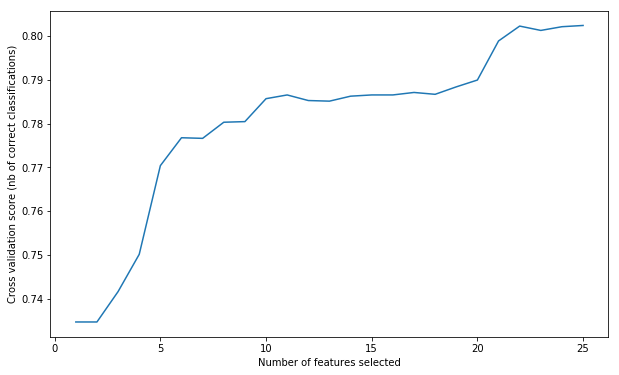

In [28]:
# Selecting features
# use Recursive feature elimination with cross-validation (#fold=10) to select variables
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

X = data_new2.loc[:,data_new2.columns !='Churn_Yes']
y = data_new2['Churn_Yes']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

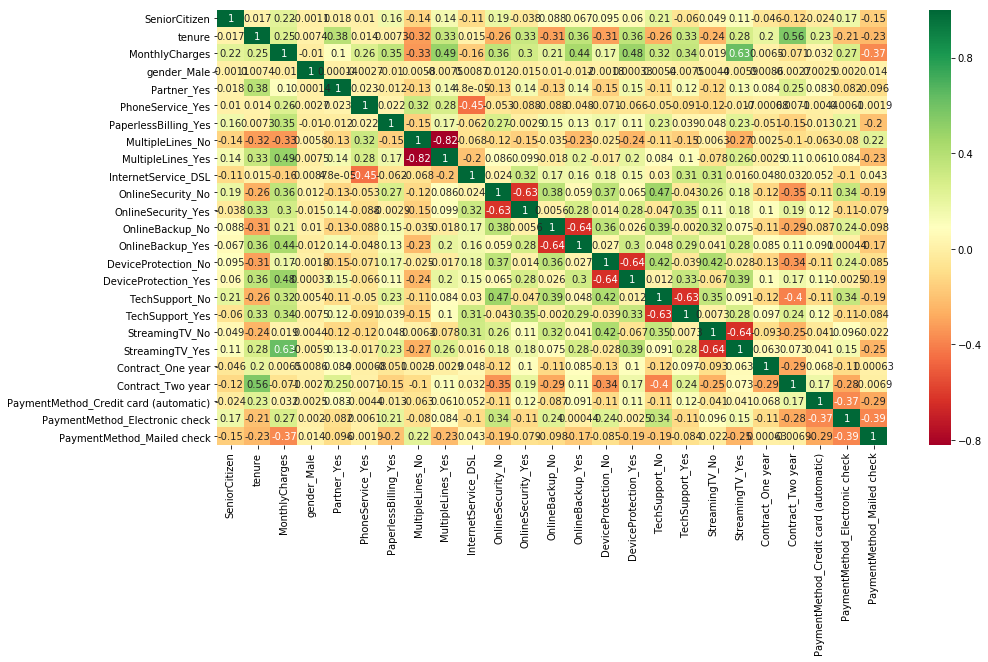

In [29]:
# Have a look at the correlation between out selected features
Selected_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male', 'Partner_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
X = data_new2[Selected_features]

plt.subplots(figsize=(15,8))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [30]:
# Train the logistic regression model

In [46]:
# use SMOTE to handle imbalanced data
from sklearn.linear_model import LogisticRegressionCV
from collections import Counter
from imblearn.over_sampling import SMOTE

optimal_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male', 'Partner_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes', 'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
X_optimal = data_new2[optimal_features]
y = data_new2['Churn_Yes']
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_optimal, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5174, 1: 5174})


In [47]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_res,y_res,test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8278, 25) (2070, 25) (8278,) (2070,)


In [48]:
# logistic regression
logreg = LogisticRegressionCV(cv=5).fit(X_train,Y_train)
Y_Pre = logreg.predict(X_test)
Y_Pre_proba = logreg.predict_proba(X_test)[:,1]
print(Y_Pre)
print(Y_Pre_proba)
print('Accuracy: %0.9f' % logreg.score(X_test,Y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

[1 0 1 ... 1 1 0]
[0.55654951 0.06655818 0.90418037 ... 0.88817202 0.73008257 0.13183792]
Accuracy: 0.771980676


In [49]:
#print the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, Y_Pre_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

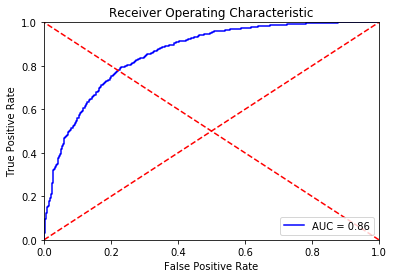

0.8580814496543994


In [50]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([1, 0], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(roc_auc)

In [51]:
#decision tree
from sklearn import tree

# Create each decision tree (pruned and unpruned)
decisionTree_unpruned = tree.DecisionTreeClassifier()
decisionTree = tree.DecisionTreeClassifier(max_depth = 4)

# Fit each tree to our training data
decisionTree_unpruned = decisionTree_unpruned.fit(X=X_train, y=Y_train)
decisionTree = decisionTree.fit(X=X_train, y=Y_train)

test_y_pred_dt = decisionTree.predict(X_test)
y_pre_proba = decisionTree.predict_proba(X_test)[:,1]

print('Accuracy of decision tree classifier on test set: {:.9f}'.format(decisionTree.score(X_test, Y_test)))

Accuracy of decision tree classifier on test set: 0.804830918


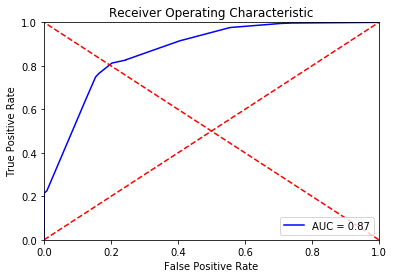

0.8692658322436015


In [53]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pre_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([1, 0], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(roc_auc)